In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.metrics import r2_score
from sklearn import linear_model 
from sklearn.model_selection import train_test_split

In [164]:
df = pd.read_csv("dataset.csv")

In [165]:
df = df.fillna(0)
df.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,0
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,0
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,0
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


In [166]:
bmi_mapping = {
    'Overweight': 2,
    'Normal': 1,
    'Obese': 3,
    'Normal Weight': 0
}

sleepd_mapping = {
    'Sleep Apnea': 1,
    'Insomnia': 2 
}

df['BMI Category'] = df['BMI Category'].replace(bmi_mapping)
df['Sleep Disorder'] = df['Sleep Disorder'].replace(sleepd_mapping)

In [167]:
df.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,2,126/83,77,4200,0
1,2,Male,28,Doctor,6.2,6,60,8,1,125/80,75,10000,0
2,3,Male,28,Doctor,6.2,6,60,8,1,125/80,75,10000,0
3,4,Male,28,Sales Representative,5.9,4,30,8,3,140/90,85,3000,1
4,5,Male,28,Sales Representative,5.9,4,30,8,3,140/90,85,3000,1


# Calculate the Correlation

In [168]:
df_activity_quality = df[['Quality of Sleep', 'Physical Activity Level']]
df_stress_sleep = df[['Stress Level', 'Sleep Duration']]
df_sleep_bmi = df[['Sleep Disorder', 'BMI Category']]

correlation_matrixـaq = df_activity_quality.corr()
correlation_matrixـss = df_stress_sleep.corr()
correlation_matrixـsb = df_sleep_bmi.corr()

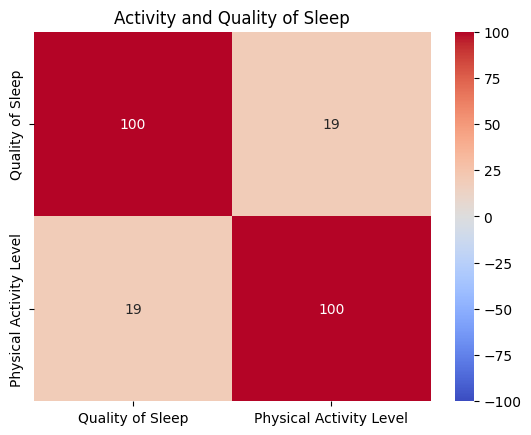

In [169]:
sns.heatmap(correlation_matrixـaq * 100, annot=True, fmt='.0f', cmap='coolwarm', vmin=-100, vmax=100)
plt.title('Activity and Quality of Sleep')
plt.show()

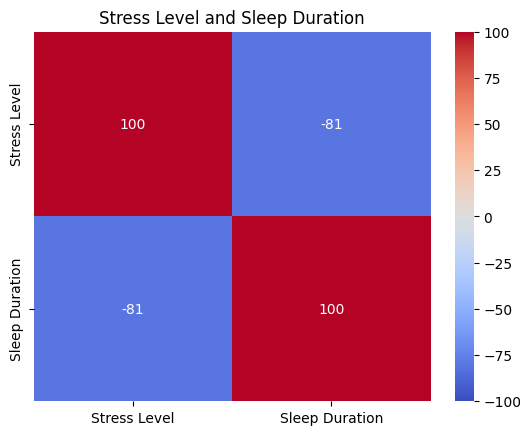

In [170]:
sns.heatmap(correlation_matrixـss * 100, annot=True, fmt='.0f', cmap='coolwarm', vmin=-100, vmax=100)
plt.title('Stress Level and Sleep Duration')
plt.show()

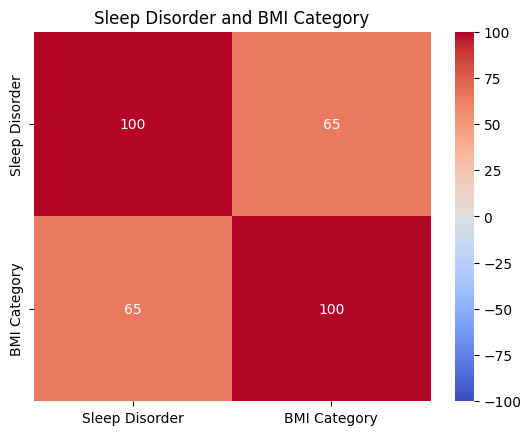

In [171]:
sns.heatmap(correlation_matrixـsb * 100, annot=True, fmt='.0f', cmap='coolwarm', vmin=-100, vmax=100)
plt.title('Sleep Disorder and BMI Category')
plt.show()

# Quality Average in Different Categories

In [172]:
df.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,2,126/83,77,4200,0
1,2,Male,28,Doctor,6.2,6,60,8,1,125/80,75,10000,0
2,3,Male,28,Doctor,6.2,6,60,8,1,125/80,75,10000,0
3,4,Male,28,Sales Representative,5.9,4,30,8,3,140/90,85,3000,1
4,5,Male,28,Sales Representative,5.9,4,30,8,3,140/90,85,3000,1


In [173]:
bmi_mapping = {
    2: 'Overweight',
    1: 'Normal',
    3: 'Obese',
    0: 'Normal Weight'
}

df['BMI Category (Str)'] = df['BMI Category'].replace(bmi_mapping)
df['Quality of Sleep'].value_counts()

Quality of Sleep
8    109
6    105
7     77
9     71
5      7
4      5
Name: count, dtype: int64

In [174]:
grouped_bmi_qs = df.groupby("BMI Category (Str)")["Quality of Sleep"].mean().sort_values()
grouped_occ_qs = df.groupby("Occupation")["Quality of Sleep"].mean().sort_values()
grouped_age_qs = df.groupby("Age")["Quality of Sleep"].mean().sort_values()

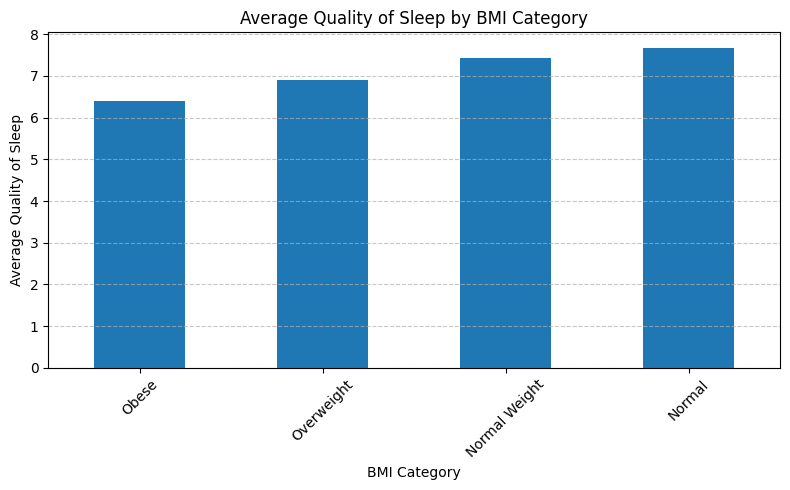

In [175]:
plt.figure(figsize=(8,5))
grouped_bmi_qs.plot(kind="bar")

plt.title("Average Quality of Sleep by BMI Category")
plt.xlabel("BMI Category")
plt.ylabel("Average Quality of Sleep")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

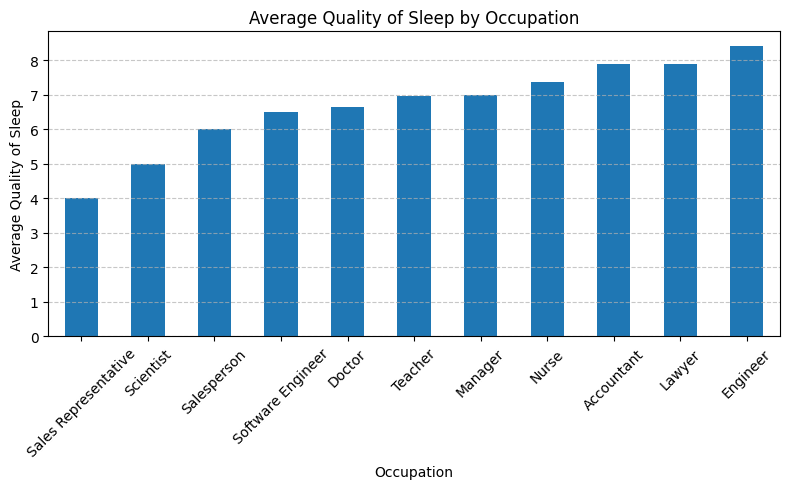

In [176]:
plt.figure(figsize=(8,5))
grouped_occ_qs.plot(kind="bar")

plt.title("Average Quality of Sleep by Occupation")
plt.xlabel("Occupation")
plt.ylabel("Average Quality of Sleep")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

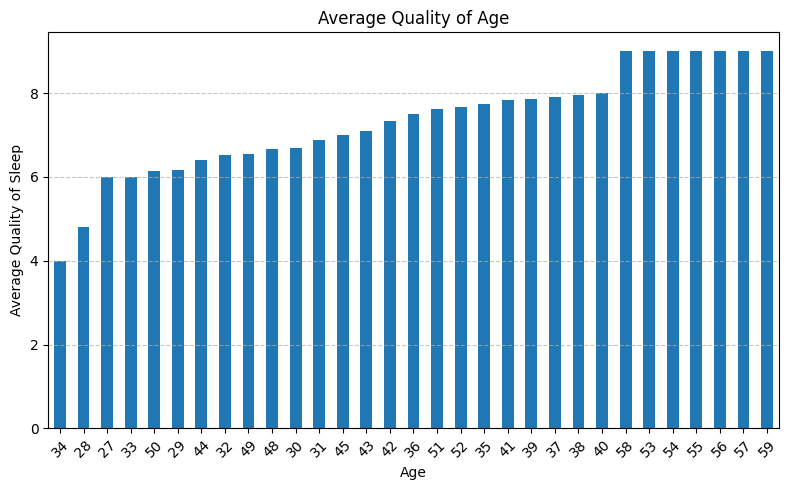

In [177]:
plt.figure(figsize=(8,5))
grouped_age_qs.plot(kind="bar")

plt.title("Average Quality of Age")
plt.xlabel("Age")
plt.ylabel("Average Quality of Sleep")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Predict Quality of Sleep

In [178]:
df['Occupation'].value_counts()

Occupation
Nurse                   73
Doctor                  71
Engineer                63
Lawyer                  47
Teacher                 40
Accountant              37
Salesperson             32
Software Engineer        4
Scientist                4
Sales Representative     2
Manager                  1
Name: count, dtype: int64

In [179]:
gender_mapping = {
    'Male': 0,
    'Female': 1
}

occ_mapping = {
    "Nurse": 0,
    "Doctor": 1,
    "Engineer": 2,
    "Lawyer": 3,
    "Teacher": 4,
    "Accountant": 5,
    "Salesperson": 6,
    "Software Engineer": 7,
    "Scientist": 8,
    "Sales Representative": 9,
    "Manager": 10
}

df_pr = df.copy()
df_pr['Gender'] = df_pr['Gender'].replace(gender_mapping)
df_pr['Occupation'] = df_pr['Occupation'].replace(occ_mapping)

df_pr.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder,BMI Category (Str)
0,1,0,27,7,6.1,6,42,6,2,126/83,77,4200,0,Overweight
1,2,0,28,1,6.2,6,60,8,1,125/80,75,10000,0,Normal
2,3,0,28,1,6.2,6,60,8,1,125/80,75,10000,0,Normal
3,4,0,28,9,5.9,4,30,8,3,140/90,85,3000,1,Obese
4,5,0,28,9,5.9,4,30,8,3,140/90,85,3000,1,Obese


In [180]:
x = df_pr.drop(['Quality of Sleep', 'Blood Pressure', 'BMI Category (Str)', 'Person ID'], axis=1)
x.head()

,Gender,Age,Occupation,Sleep Duration,Physical Activity Level,Stress Level,BMI Category,Heart Rate,Daily Steps,Sleep Disorder
0,0,27,7,6.1,42,6,2,77,4200,0
1,0,28,1,6.2,60,8,1,75,10000,0
2,0,28,1,6.2,60,8,1,75,10000,0
3,0,28,9,5.9,30,8,3,85,3000,1
4,0,28,9,5.9,30,8,3,85,3000,1


In [181]:
y = df_pr['Quality of Sleep']
y.head()

0    6
1    6
2    6
3    4
4    4
Name: Quality of Sleep, dtype: int64

In [182]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2) 

In [183]:
model = linear_model.LinearRegression()
model.fit(x_train, y_train)
out_model = model.predict(x_test)

In [ ]:
"""
Types of Gender:
    'Male': 0
    'Female': 1

Occupations:
    "Nurse": 0
    "Doctor": 1
    "Engineer": 2
    "Lawyer": 3
    "Teacher": 4
    "Accountant": 5
    "Salesperson": 6
    "Software Engineer": 7
    "Scientist": 8
    "Sales Representative": 9
    "Manager": 10

BMI Categories:
    'Overweight': 2
    'Normal': 1
    'Obese': 3
    'Normal Weight': 0

Types of Sleep Disorder:
    'None': 0
    'Sleep Apnea': 1
    'Insomnia': 2 
"""

input_data = {
    'Gender': 1,
    'Age': 59,
    'Occupation': 0,
    'Sleep Duration': 8.1,
    'Physical Activity Level': 75,
    'Stress Level': 3,
    'BMI Category': 2,
    'Heart Rate': 68,
    'Daily Steps': 7000,
    'Sleep Disorder': 1
}

input_df = pd.DataFrame(input_data, index=[0])

# Actual Quality of Sleep with this parameters is 9
prediction = model.predict(input_df)
print(prediction)

[8.96487995]


In [187]:
r2 = r2_score(y_test, out_model)
percentage_correctness = r2 * 100

print(f"Percentage of Correctness (R²): {percentage_correctness:.2f}%")

Percentage of Correctness (R²): 94.78%
